## 확률과정

In [13]:
options(repr.plot.width = 12, repr.plot.height = 6)

In [14]:
library(forecast)

### 정상시계열

In [2]:
z = rnorm(200) ## Z ~ N(0, 1)

In [3]:
a = c(1, 2, 3)

In [9]:
data.table::shift(a, 2) ## 두 개를 뒤로 밀어내는 함수

[1] NA NA  1

In [12]:
cor(z, data.table::shift(z, 1)) ## 1차 자기상관, NA 있어서 안나옴
cor(z, data.table::shift(z, 1), use = 'pairwise.compl9## 다 있는 관측치만 비교함

[1] NA

[1] -0.07302135

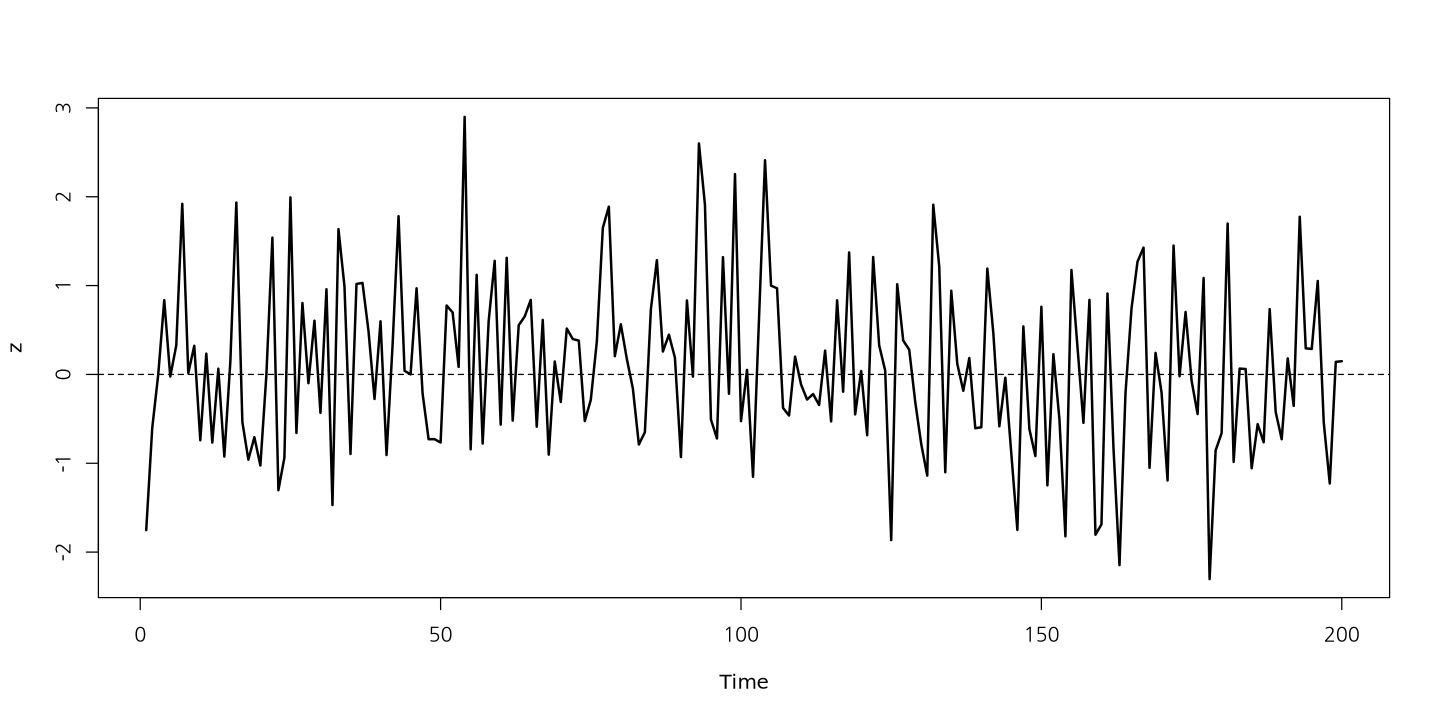

In [15]:
## 시계열 그림
plot.ts(z, lwd = 2)
abline(h = 0, lty = 2)

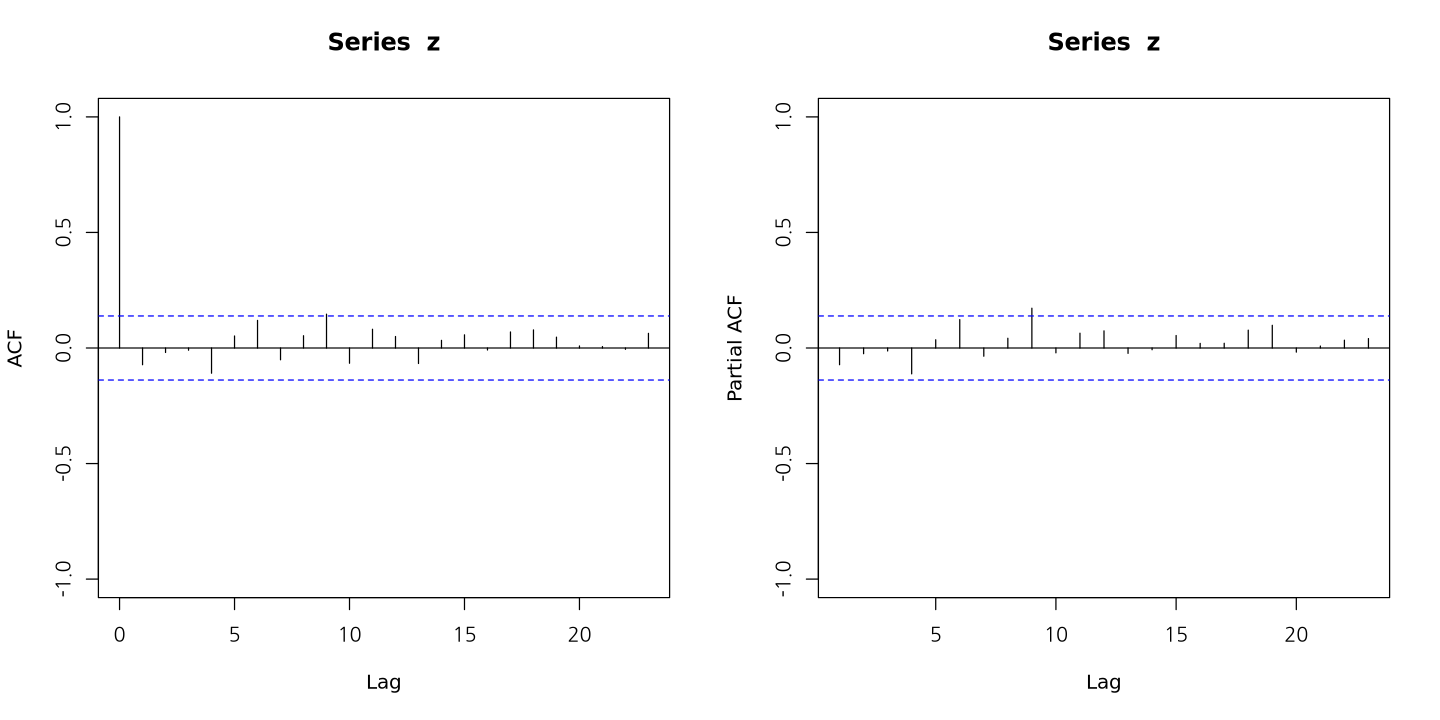

In [16]:
## ACF, PACF
par(mfrow = c(1, 2))
acf(z, ylim = c(-1, 1)) ## lag.max parameter도 있음
pacf(z, ylim = c(-1, 1))
## 계절성분이 없는 경우 많이 볼 필요는 없음.

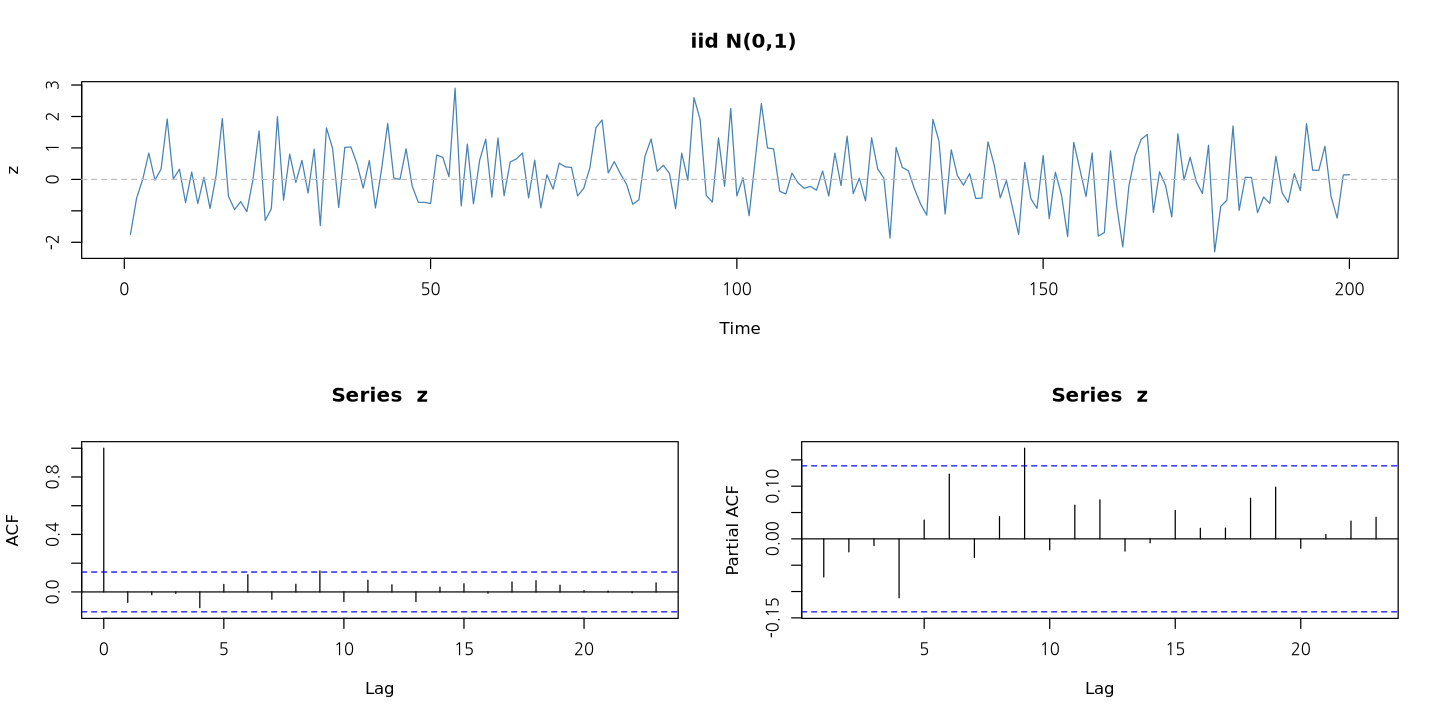

In [17]:
## 한번에 그리기
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE)) ## 2 by 2 matrix에 위치를 찍어줌.
plot.ts(z,col='steelblue', main = paste0(' iid N(0,1)'))
abline(h=0, col='grey', lty=2)
acf(z)
pacf(z)
graphics.off()

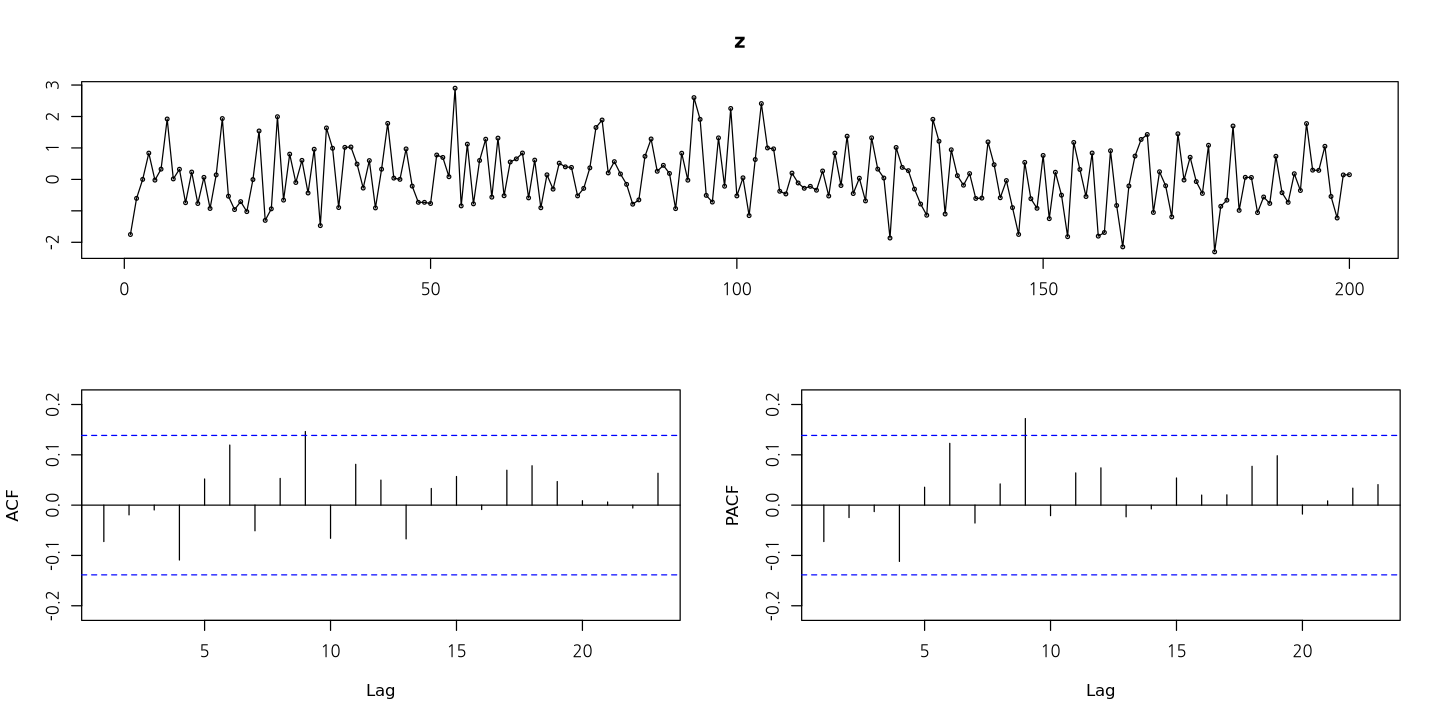

In [18]:
## 한번에 하기
forecast::tsdisplay(z)

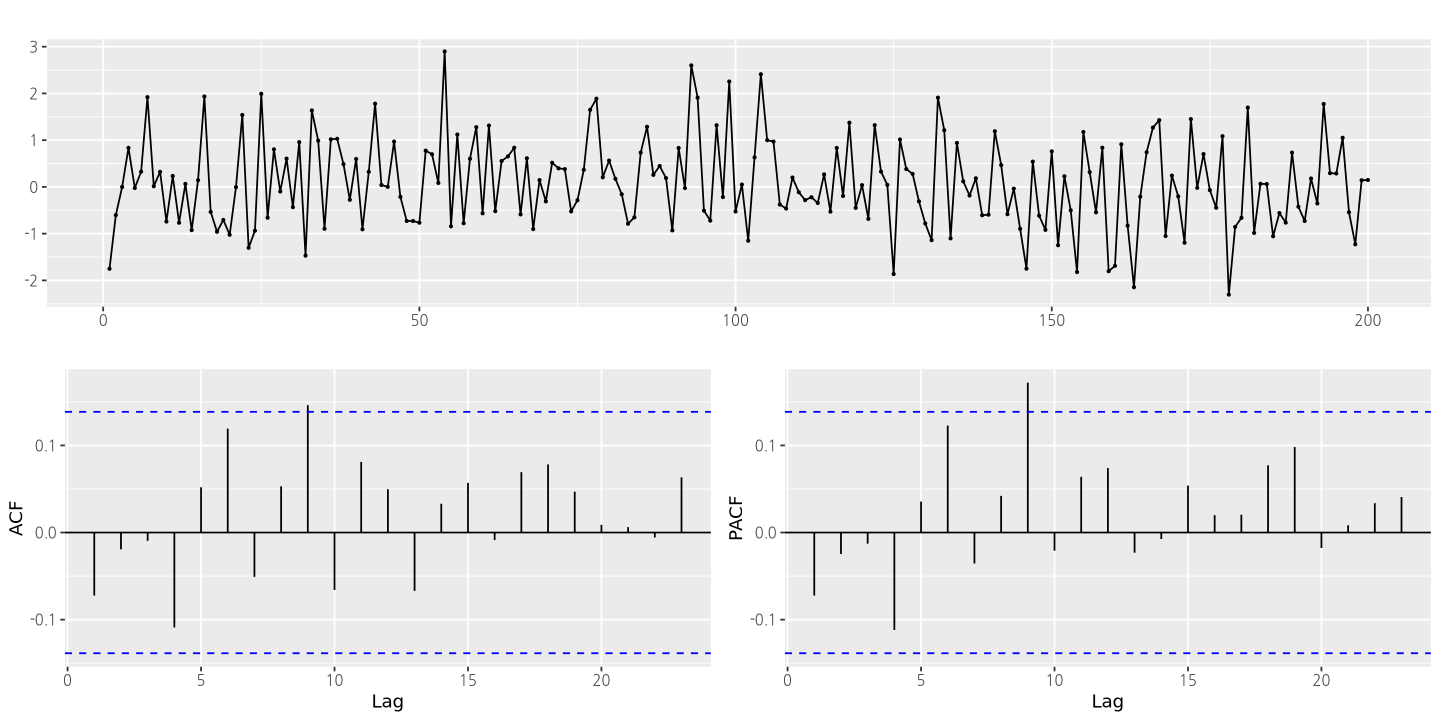

In [19]:
forecast::ggtsdisplay(z)

### 확률보행과정

$Z_t = Z_{t-1} + \epsilon_t = \epsilon_1 + \cdots + \epsilon_t, ~ \epsilon_i \sim \text{WN}(0, \sigma^2)$

In [20]:
a = 1:4
cumsum(a) ## 누적합

[1]  1  3  6 10

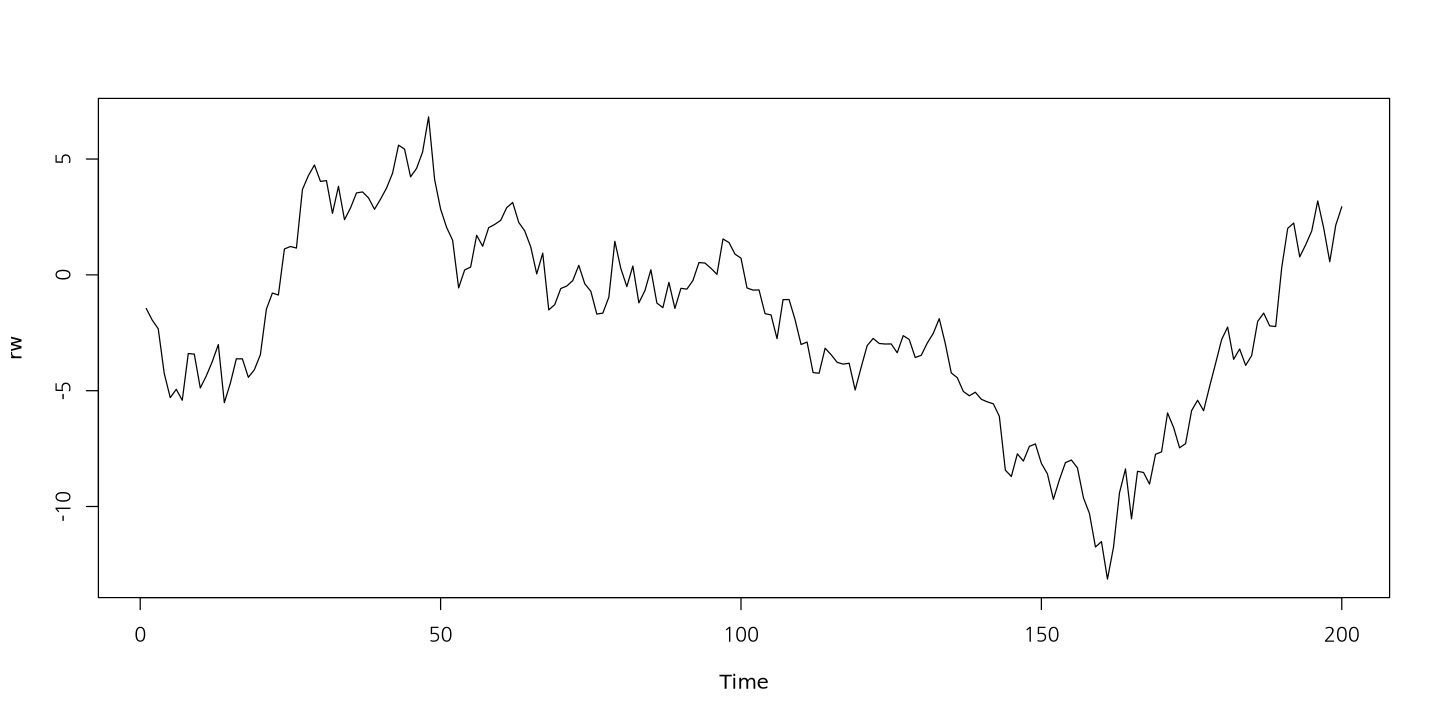

In [25]:
z = rnorm(200, 0, 1)
rw = cumsum(z)
plot.ts(rw)

> 예측하기 어려운, 분산이 큰 비정상 시계열

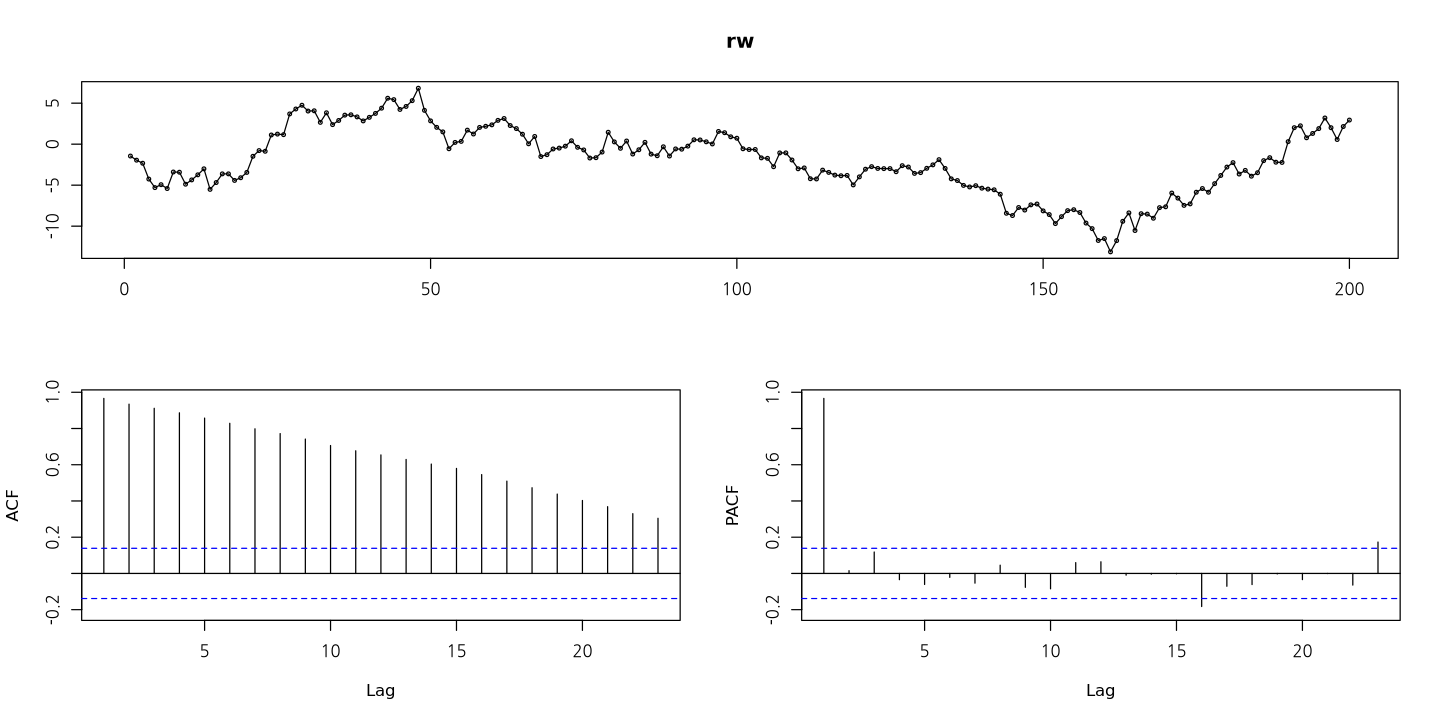

In [27]:
tsdisplay(rw)

> 랜덤워크의 ACF는 항상 천천히 감소하는 모양, PACF는 첫 시차만 크고 나머지는 작음.

`-` 절편이 있는 확률보행과정(추세 존재)

$Z_t = \delta + Z_{t-1} + \epsilon_t = t\delta + \epsilon_1 + \cdots + \epsilon_t, ~ \epsilon_i \sim \text{WN}(0, \sigma^2)$

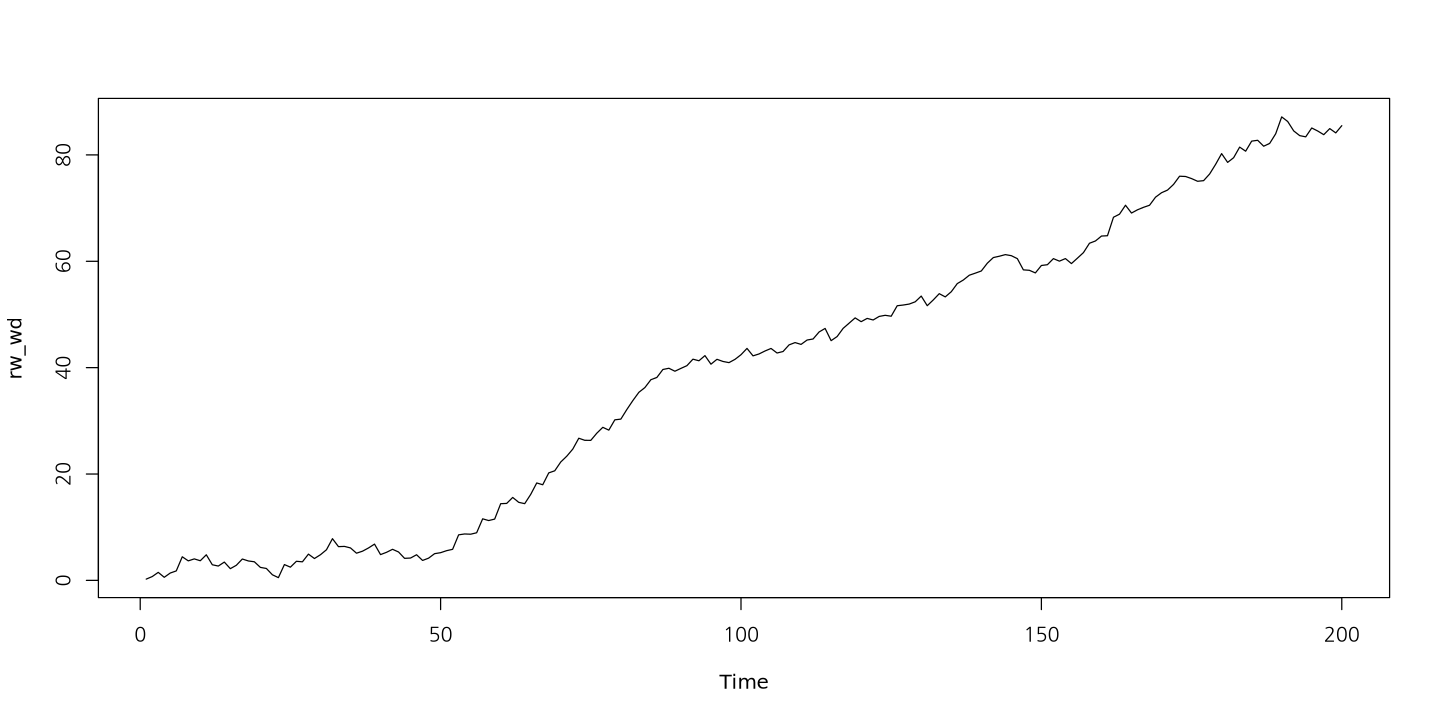

In [29]:
rw_wd = c()
delta = 0.3

rw_wd[1] = delta + rnorm(1)

for (k in 2:200) {
    rw_wd[k] = delta + rw_wd[k-1] + rnorm(1)
}

plot.ts(rw_wd)

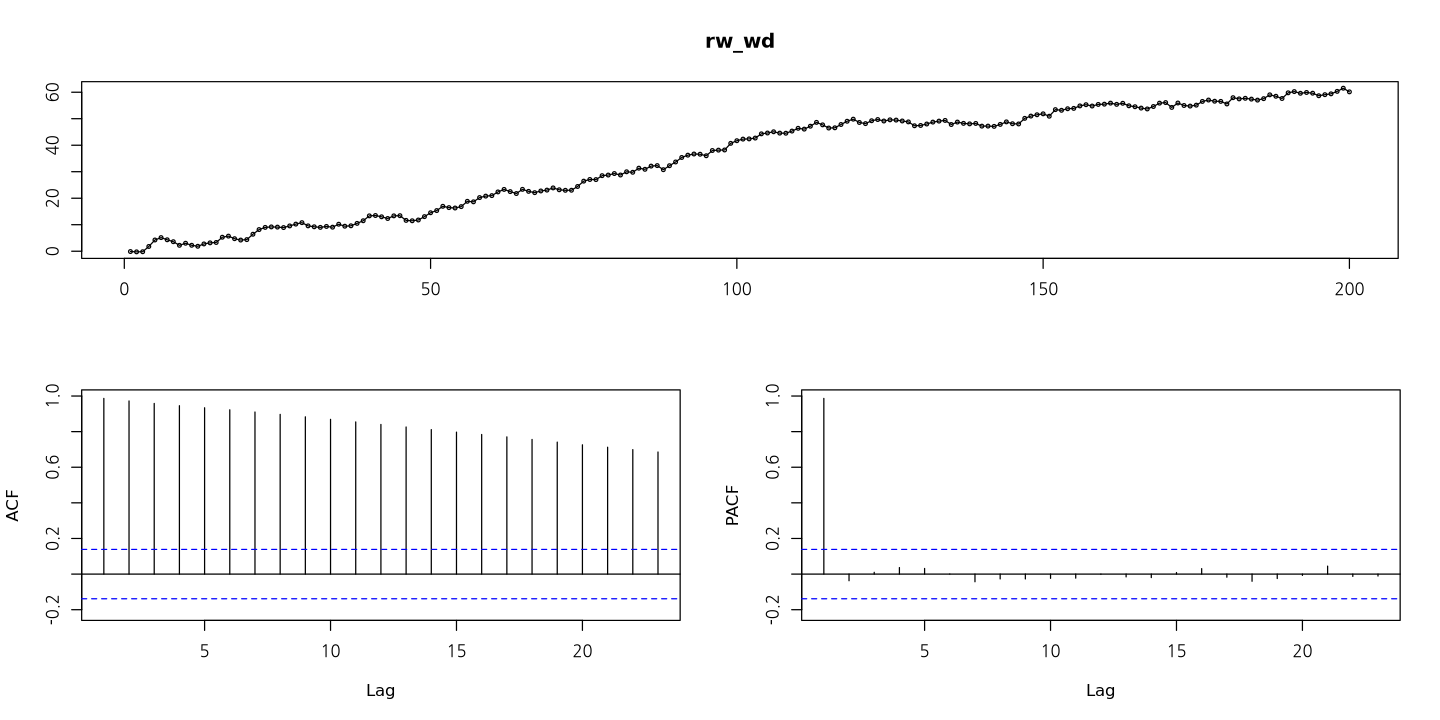

In [30]:
n = 200
rw_wd = (1:n)*delta + cumsum(rnorm(n)) ## 정리된 formula로 처리

tsdisplay(rw_wd)

> ACF는 진짜 천천히 감소, PACF는 1시차까지만 살아남는 절단 형태 -> 결정적 추세, 확률적 추세든 존재한다.

`-` 여러 경우

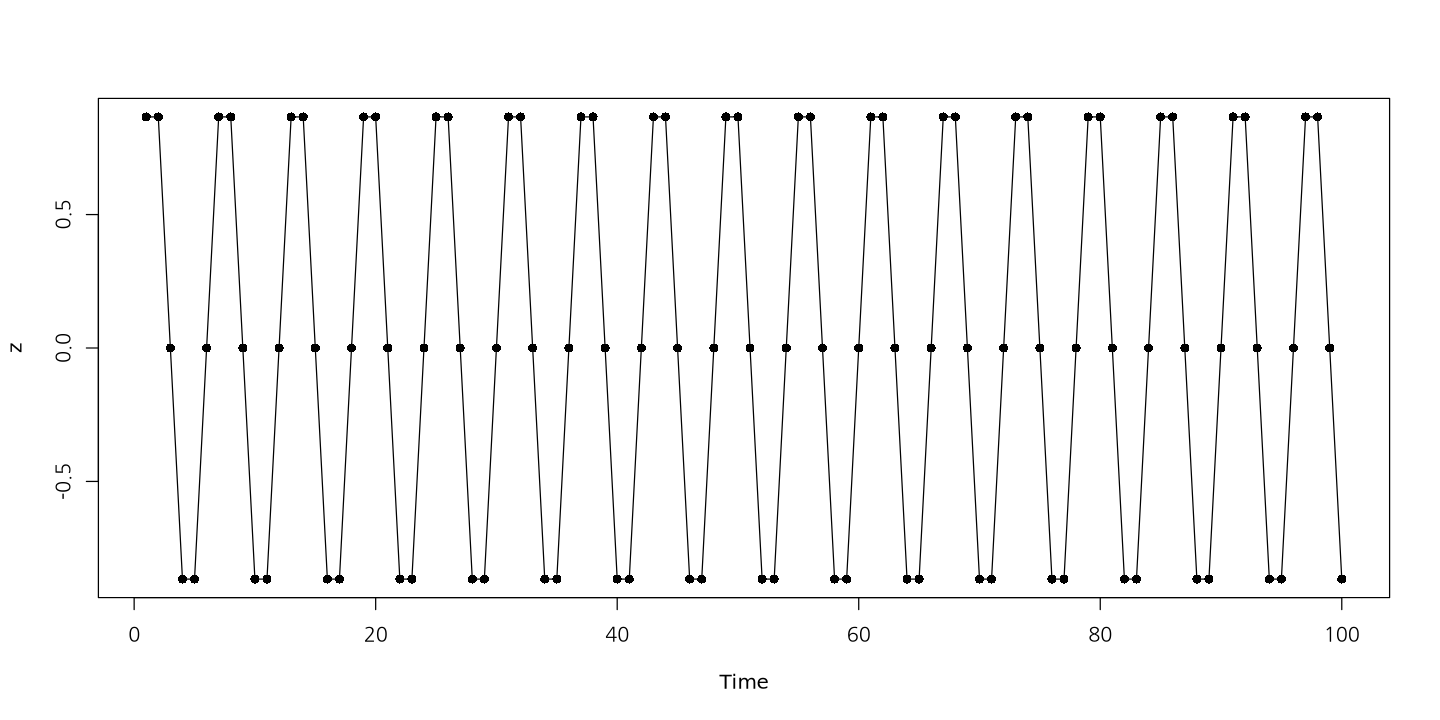

In [31]:
t = 1:100
z = sin(t*pi/3)
plot.ts(z)
points(t, z, pch = 16)

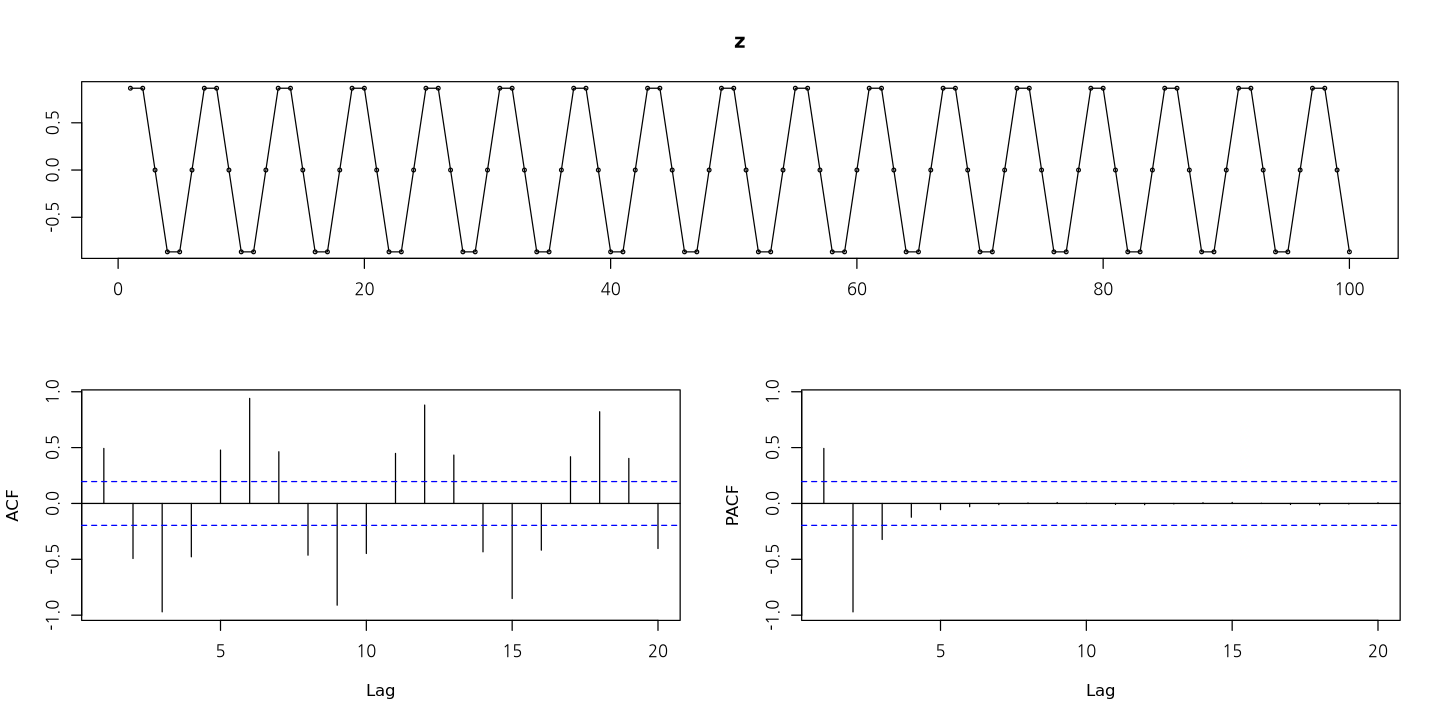

In [32]:
tsdisplay(z)

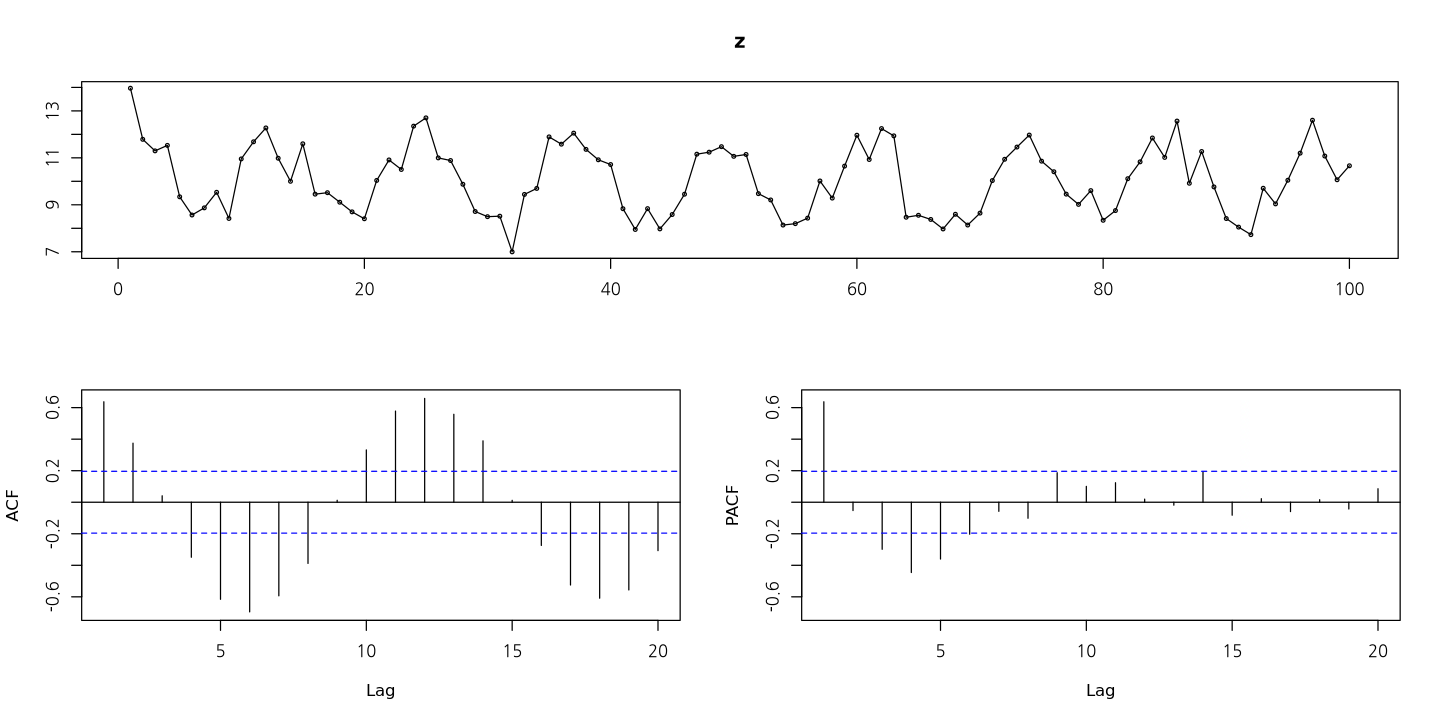

In [33]:
s = 12
z <- sin(2*t*pi/s) + 1.5*cos(2*t*pi/s) + rnorm(100,0,0.7) + 10
tsdisplay(z)

> 주기가 12정도 되는 것 같음. PACF는 사인 곡선을 그리며 감소함.
>
> 애초에 결정적 주기라는데여ㅛ

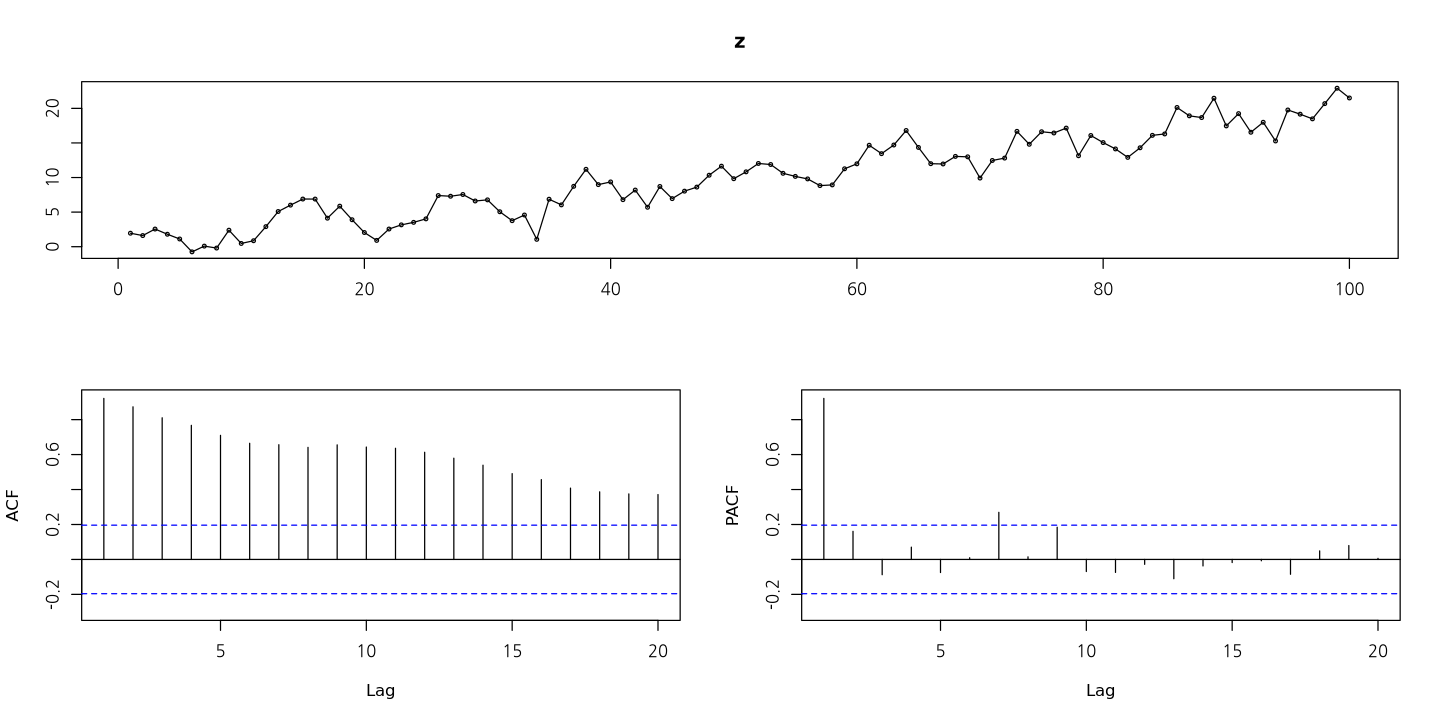

In [34]:
s <- 12
z <- 0.2*t + 2*sin(2*t*pi/s) + rnorm(100,0,1.2)
forecast::tsdisplay(z)

추세와 계절성분이 있는 경우. ACF가 천천히 감소하다가 중간에 살짝 튐

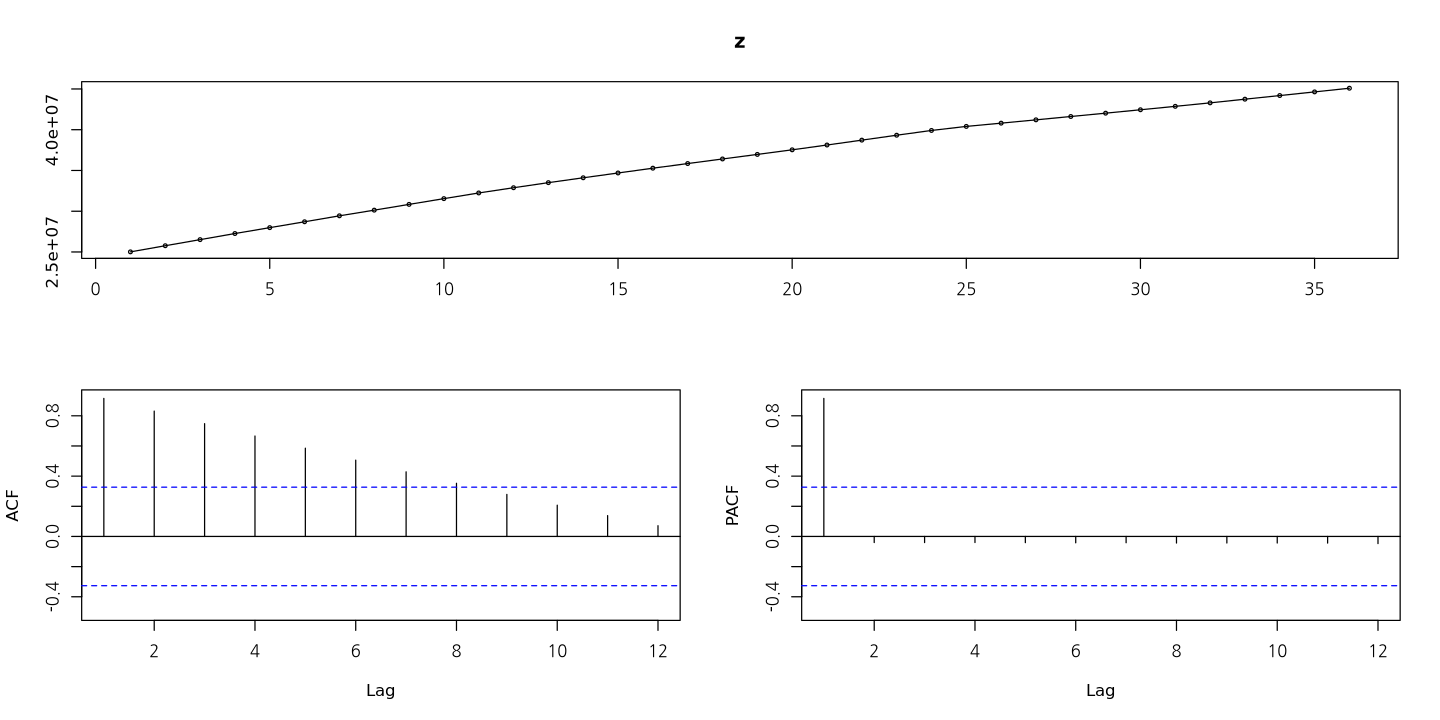

In [38]:
z = scan("~/TS2024/data/Time Series Data/population.txt")
tsdisplay(z)

> PACF는 절단 형태. 추세가 있기 때문

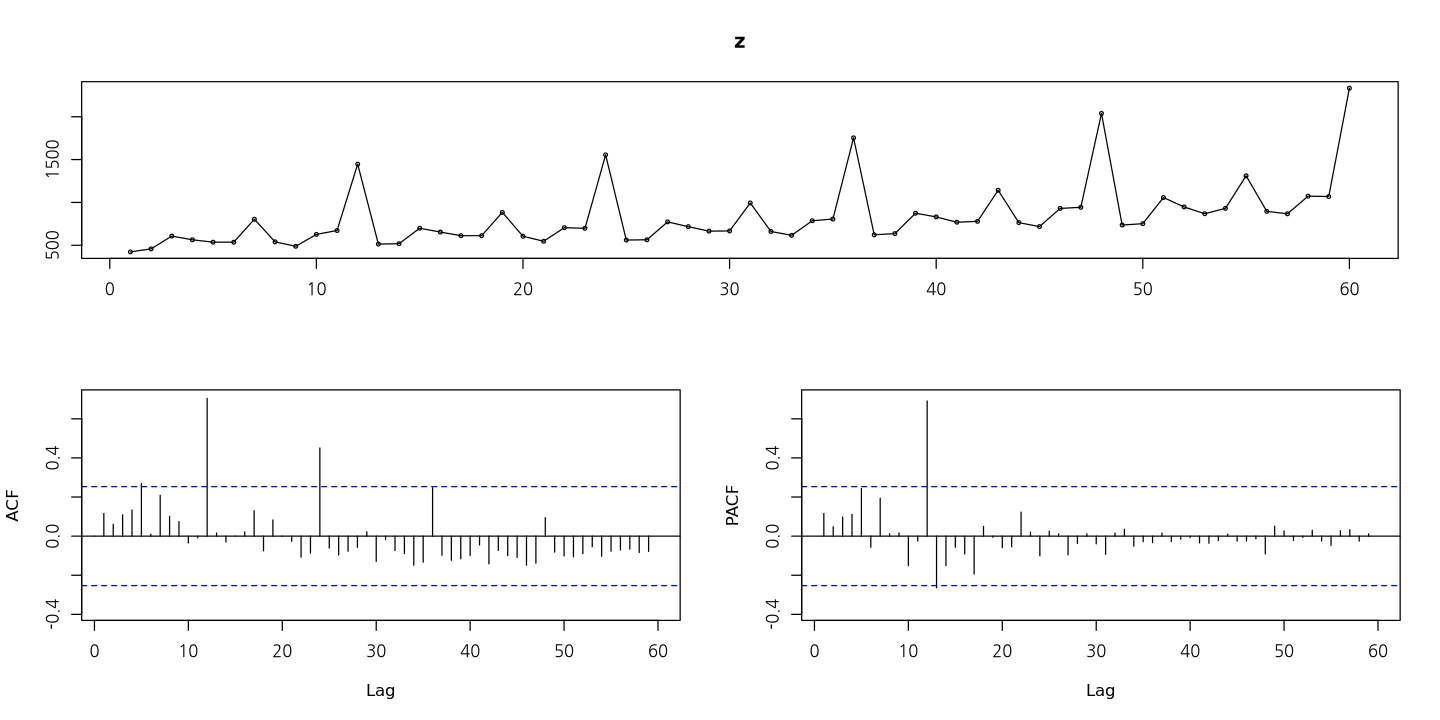

In [40]:
z <-scan("~/TS2024/data/Time Series Data/depart.txt")
forecast::tsdisplay(z, lag.max=60)

> 천천히 감소를 함. PACF도 12시차에서만 유의함

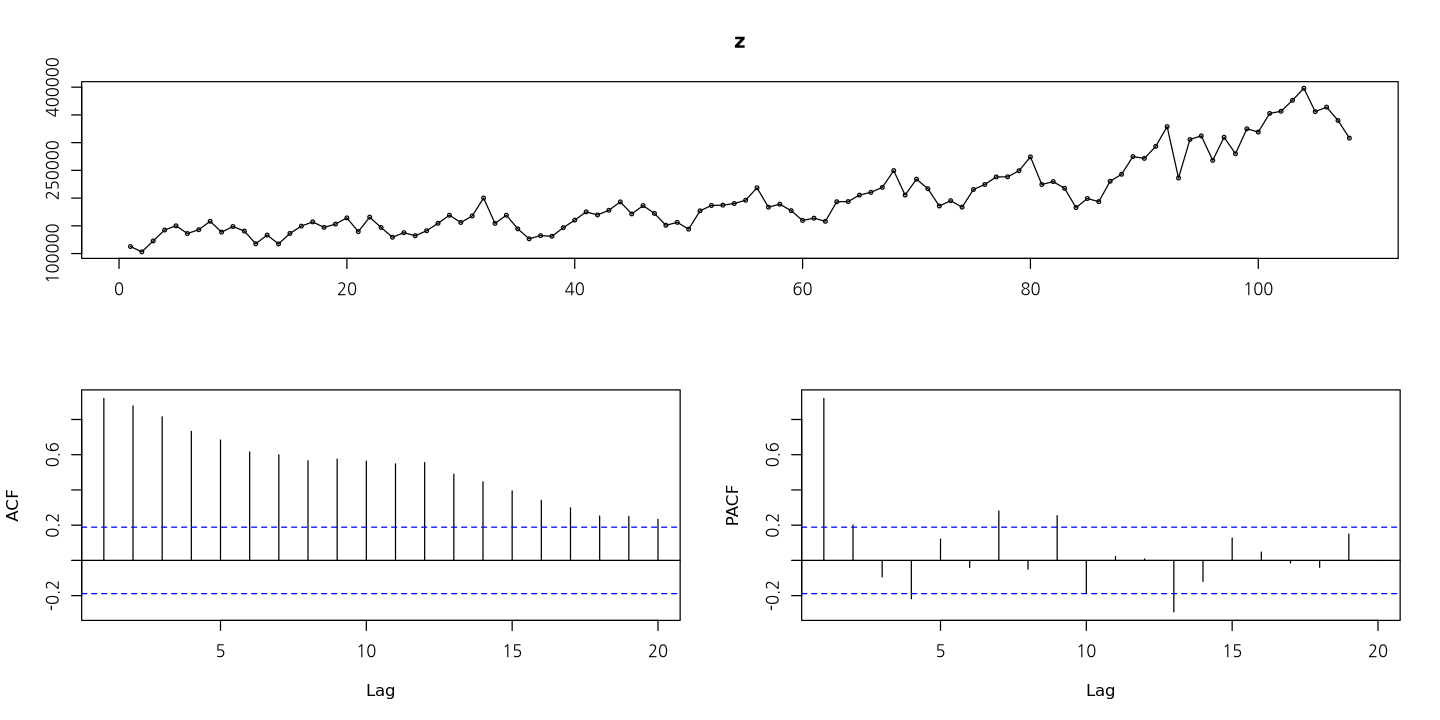

In [41]:
z <-scan("~/TS2024/data/Time Series Data/koreapass.txt")
forecast::tsdisplay(z)

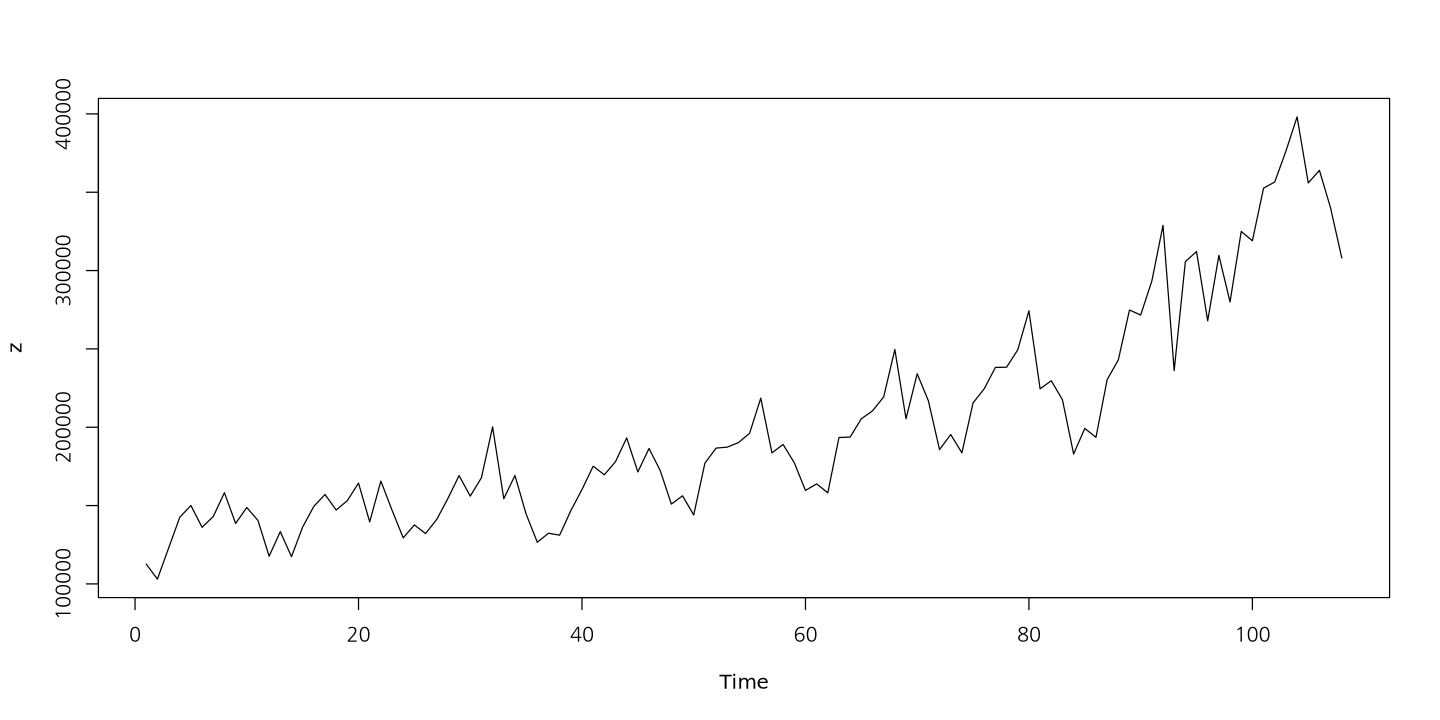

In [42]:
ts.plot(z)

> 약간 로그 변환이 필요해보이긴 함, 곡선의 추세도 있어보임.

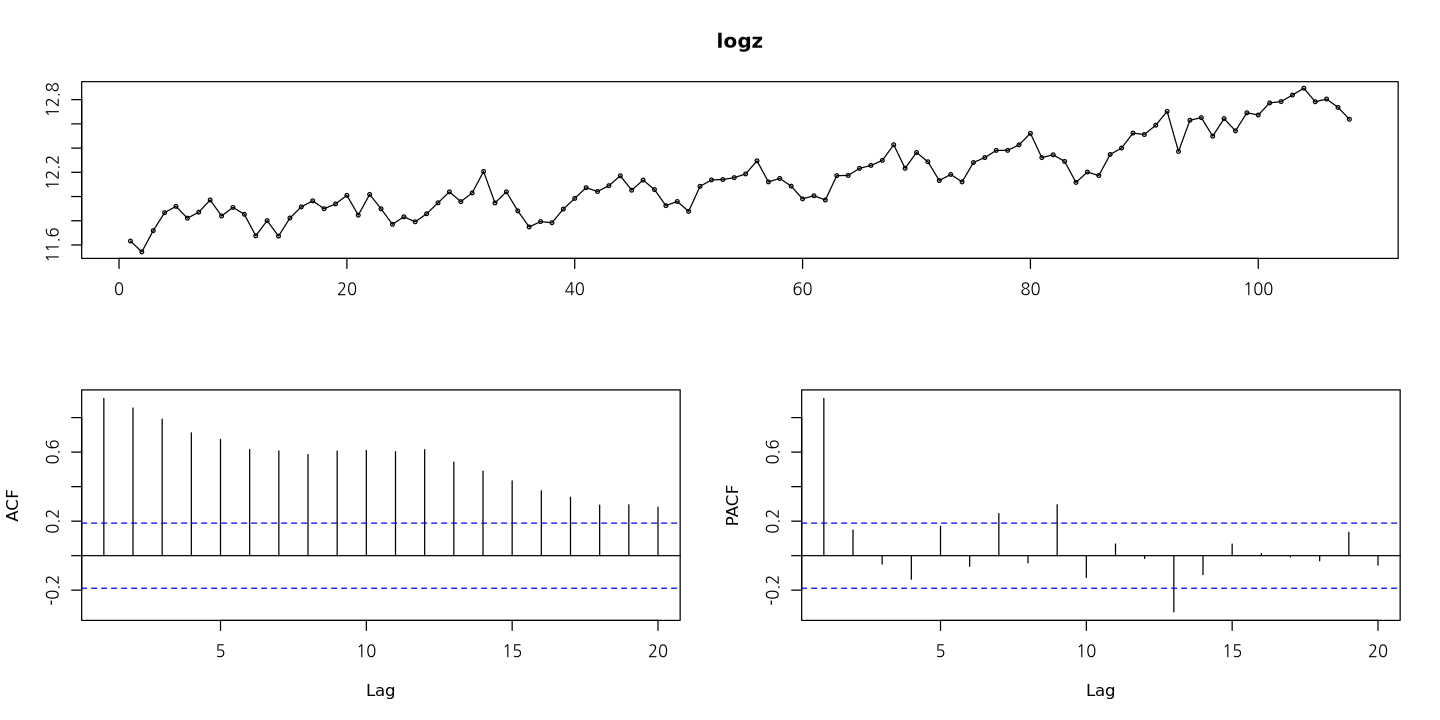

In [44]:
logz = log(z)
tsdisplay(logz)

> 이분산성이 사라짐, 확률적 추세는 여전히 존재.

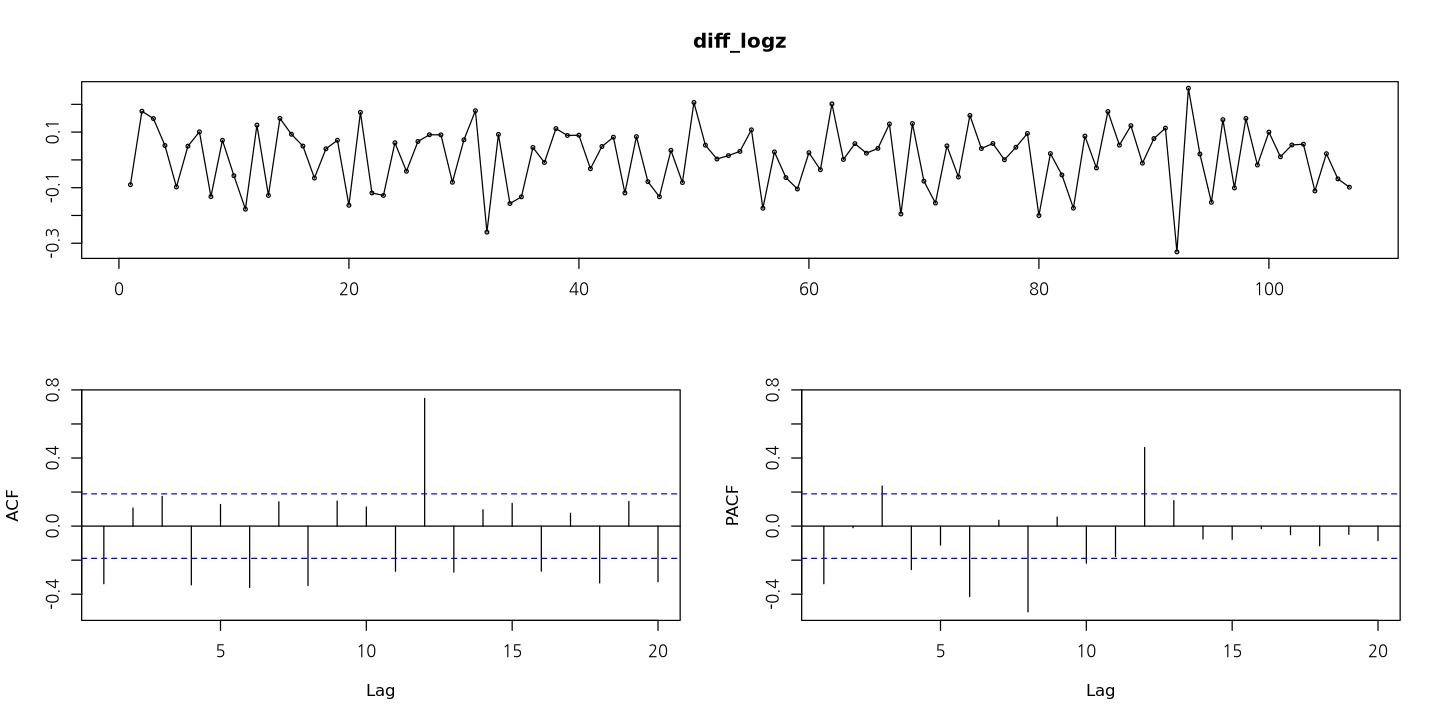

In [46]:
diff_logz = diff(logz, 1) ## 직전시점과의 차분. 차분을 할 시 확률적 추세 제거됨
tsdisplay(diff_logz)